<a href="https://colab.research.google.com/github/MohammadErfanRashidi/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Uploading the dataset
df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [28]:
# Getting the shape
df.shape

(4340, 8)

In [29]:
# Describing the dataset
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [30]:
# Checking missing values
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [32]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [33]:
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)

<ipython-input-33-505586ac600f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
<ipython-input-33-505586ac600f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
<ipython-input-33-505586ac600f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe

In [34]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [35]:
# Separating the data without name and the selling price
X = df.drop(['name', 'selling_price'], axis=1)
Y = df['selling_price']

In [36]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [37]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [38]:
# Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [39]:
# Printing the shape of train and test
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3906, 6) (434, 6)


In [40]:
# Creating a scaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transforming the test data using the fitted scaler
X_test = scaler.transform(X_test)

In [41]:
# Linear Regression
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [42]:
# Making predictions on the train data
Y_pred = model.predict(X_train)

# Evaluating the model
score = metrics.r2_score(Y_train, Y_pred)
print("R2 score:", score)

R2 score: 0.4430787587921938


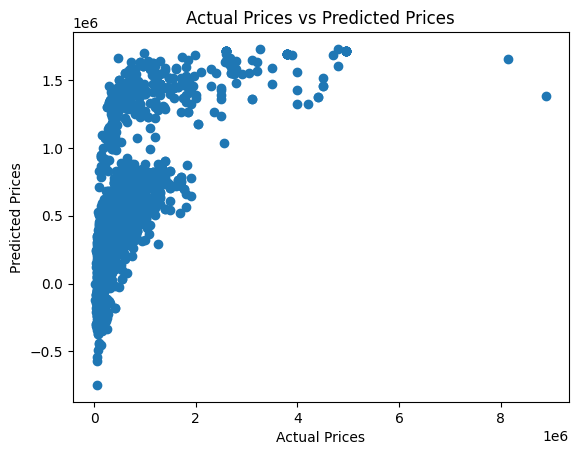

In [43]:
# Visualizing predicted data and the actual data
plt.scatter(Y_train, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [44]:
# Making predictions on the train data
Y_pred = model.predict(X_test)

# Evaluating the model
score = metrics.r2_score(Y_test, Y_pred)
print("R2 score:", score)

R2 score: 0.5212912933220205


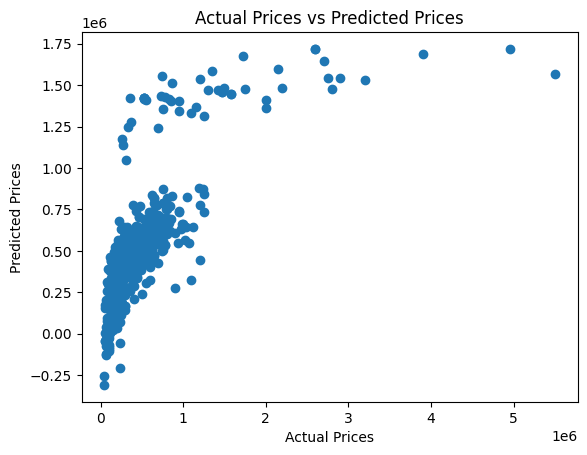

In [45]:
# Visualizing predicted data and the actual data
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

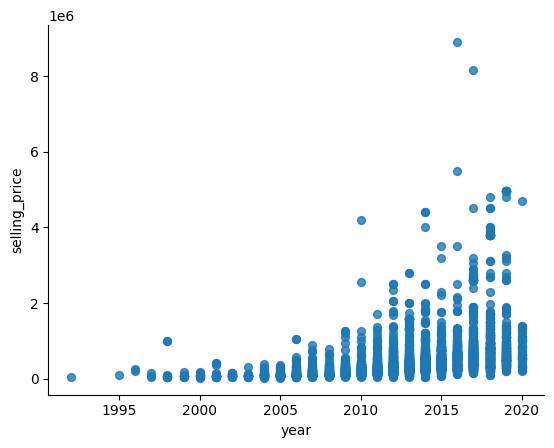

In [46]:
# Selling price vs. year
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='selling_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)